<a href="https://colab.research.google.com/github/emilyxietty/BarcodeChecker-ARM/blob/main/digit2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Digit Recognizer**

In [ ]:
# Selecting Tensorflow version v2 (the command is relevant for Colab only).
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.10.11
Tensorflow version: 2.12.0
Keras version: 2.12.0


In [ ]:
# Load the TensorBoard notebook extension.
# %reload_ext tensorboard
%load_ext tensorboard

In [ ]:
# Clear any logs from previous runs.
!rm -rf ./.logs/

In [ ]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [ ]:
# Save image parameters to the constants that we will use later for data re-shaping and for model traning.
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


In [ ]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


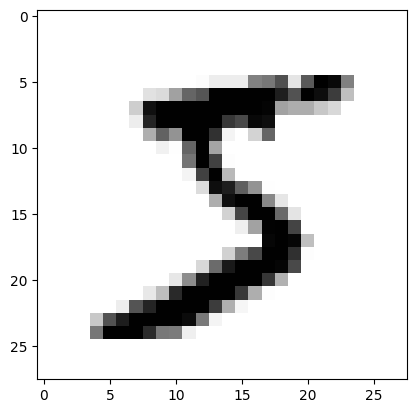

In [ ]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

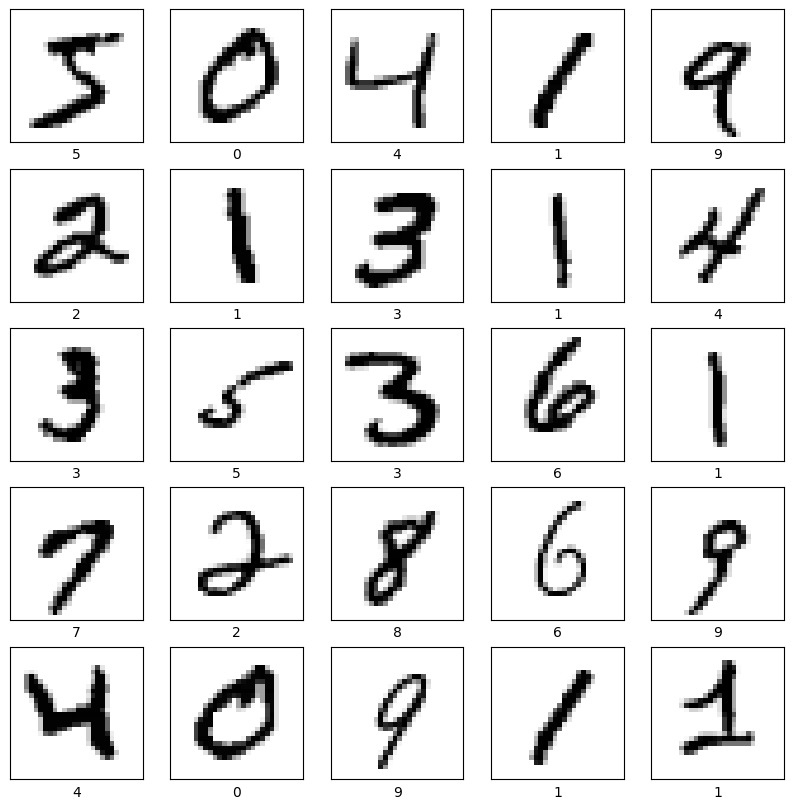

In [ ]:
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [ ]:
x_train_with_chanels = x_train.reshape(
    x_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = x_test.reshape(
    x_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (60000, 28, 28, 1)
x_test_with_chanels: (10000, 28, 28, 1)


In [ ]:
x_train_normalized = x_train_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

In [ ]:
# Let's check just one row from the 0th image to see color chanel values after normalization.
x_train_normalized[0][18]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18039216],
       [0.50980392],
       [0.71764706],
       [0.99215686],
       [0.99215686],
       [0.81176471],
       [0.00784314],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               3

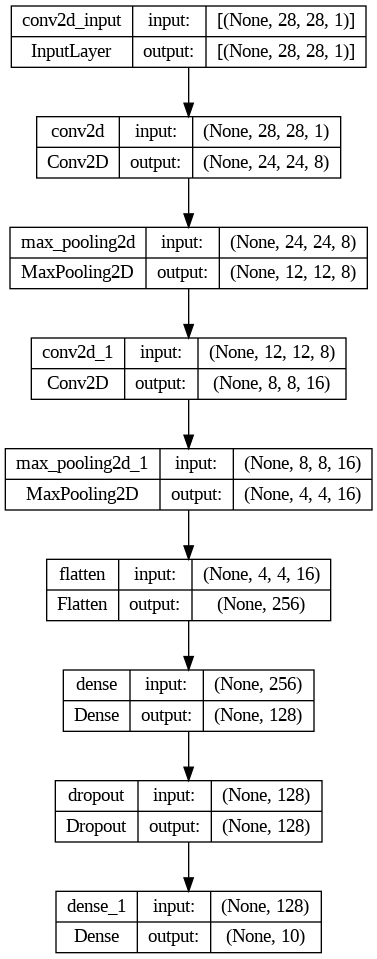

In [ ]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

In [ ]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [ ]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1875/1875 [==============================] - 29s 10ms/step - loss: 0.2101 - accuracy: 0.9359 - val_loss: 0.0648 - val_accuracy: 0.9789
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0734 - accuracy: 0.9773 - val_loss: 0.0455 - val_accuracy: 0.9854
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0561 - accuracy: 0.9831 - val_loss: 0.0375 - val_accuracy: 0.9871
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0442 - accuracy: 0.9862 - val_loss: 0.0445 - val_accuracy: 0.9849
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0368 - accuracy: 0.9879 - val_loss: 0.0322 - val_accuracy: 0.9881
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0329 - accuracy: 0.9897 - val_loss: 0.0293 - val_accuracy: 0.9901
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0279 - accuracy: 0.9906 - val_loss: 0.0330 - val_accura

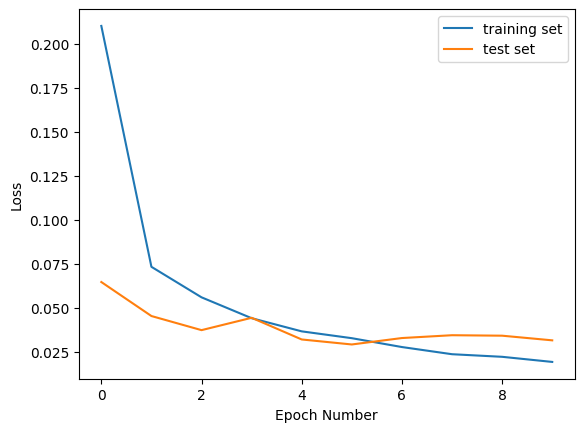

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

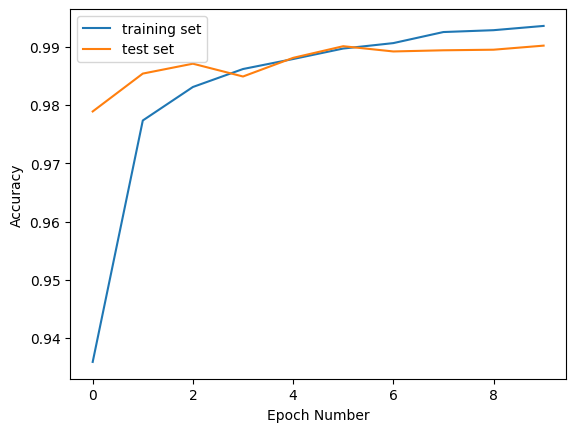

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

In [ ]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

In [ ]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test)
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

In [ ]:
model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')

In [ ]:
loaded_model = tf.keras.models.load_model(model_name)

In [ ]:
predictions_one_hot = loaded_model.predict([x_test_normalized])
print('predictions_one_hot:', predictions_one_hot.shape)

313/313 [==============================] - 1s 2ms/step
predictions_one_hot: (10000, 10)


In [ ]:
# Predictions in form of one-hot vectors (arrays of probabilities).
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,3.524851e-15,2.089326e-11,2.869385e-12,3.147310e-10,2.159077e-10,1.451580e-14,1.274790e-18,1.000000e+00,6.068246e-16,4.968887e-10
1,2.337268e-09,6.221305e-08,9.999999e-01,4.321037e-11,3.076378e-14,2.191794e-17,4.892010e-10,2.643708e-09,1.716666e-11,1.118201e-15
2,1.979320e-09,9.999998e-01,2.283760e-10,3.455905e-17,5.268767e-11,9.717034e-10,7.584211e-09,1.779033e-07,4.633663e-08,6.109802e-11
3,9.999939e-01,1.162178e-09,2.284355e-08,1.615087e-08,8.857787e-11,5.933386e-08,4.419418e-06,1.808793e-09,1.297792e-06,2.027907e-07
4,5.579414e-14,3.847783e-12,3.224836e-16,1.175416e-19,9.999995e-01,3.291910e-13,7.030252e-13,6.524157e-13,5.410143e-12,4.783370e-07
...,...,...,...,...,...,...,...,...,...,...
9995,9.411496e-15,3.210915e-10,1.000000e+00,1.352786e-11,7.935492e-17,7.113934e-22,3.114702e-18,4.695246e-08,2.349098e-13,1.177369e-18
9996,3.685156e-13,2.394916e-08,4.602761e-09,1.000000e+00,5.081774e-14,8.858747e-09,1.594236e-14,2.198874e-10,2.741004e-10,9.339836e-12
9997,7.587053e-23,1.847895e-13,5.943461e-22,1.277615e-23,1.000000e+00,1.173857e-13,1.404388e-19,7.745238e-13,2.592054e-13,6.759629e-09
9998,6.163210e-13,8.516799e-16,2.054341e-17,2.492883e-11,6.286078e-16,9.999589e-01,2.323776e-12,1.042800e-15,4.110379e-05,1.294132e-15


In [ ]:
# Let's extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

print(predictions[0])

7


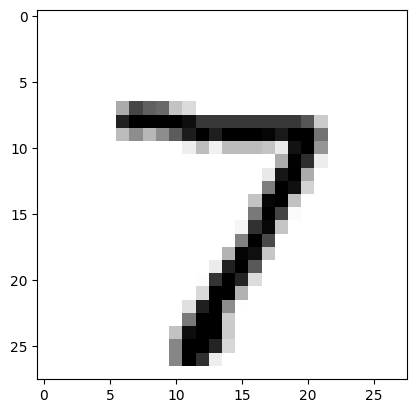

In [ ]:
plt.imshow(x_test_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

<ipython-input-30-2454e0a38738>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_cells, num_cells, plot_index + 1)


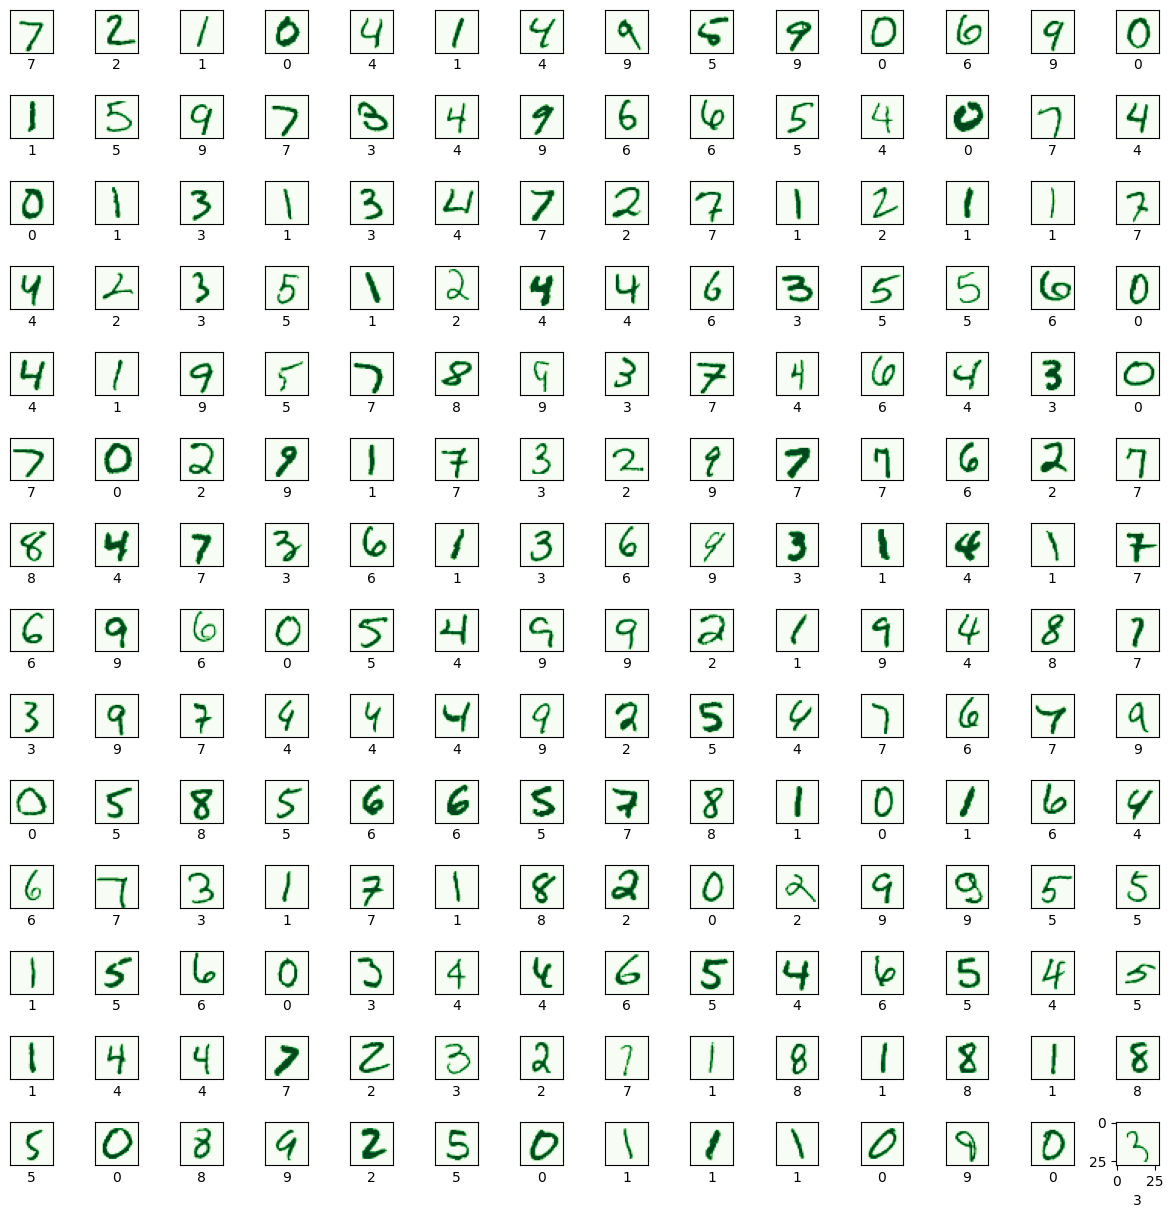

In [ ]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

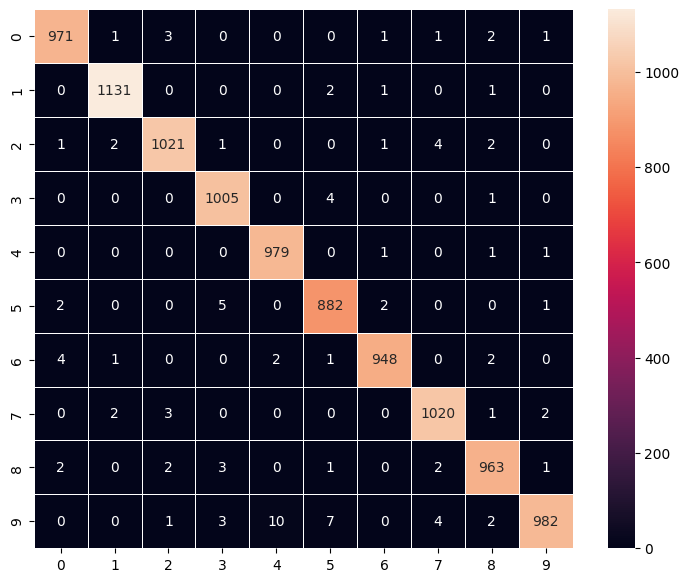

In [ ]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [ ]:
# Save the entire model as a `.keras` zip archive.
model.save('model.keras')

In [ ]:
from PIL import Image
import numpy as np

# Load the image
img = Image.open('5.png')

# Resize the image to 28x28 pixels
img = img.resize((28, 28))

# Convert the image to grayscale
img = img.convert('L')

# Convert the image data to a numpy array and normalize
img_array = np.array(img) / 255.0

# Add an extra dimension for the batch size and another for the channel
img_array = img_array.reshape(1, 28, 28, 1)


# **Test with image of number 5**

1/1 [==============================] - 0s 19ms/step
5


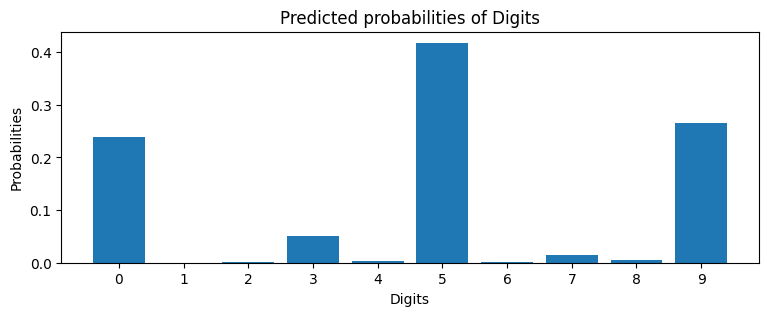

In [ ]:
import matplotlib.pyplot as plt

# Get the prediction
prediction = model.predict(img_array)

# The output of the model is a 10-element vector with the probabilities for each digit. 
# Use argmax to get the digit with the highest probability.
predicted_digit = np.argmax(prediction)
print(predicted_digit)
# Squeeze to remove single-dimensional entries from the shape of an array.
prediction = np.squeeze(prediction)

# Create a bar plot
plt.figure(figsize=(9, 3))
plt.bar(range(10), prediction)
plt.xlabel('Digits')
plt.ylabel('Probabilities')
plt.title('Predicted probabilities of Digits')
plt.xticks(range(10))
plt.show()